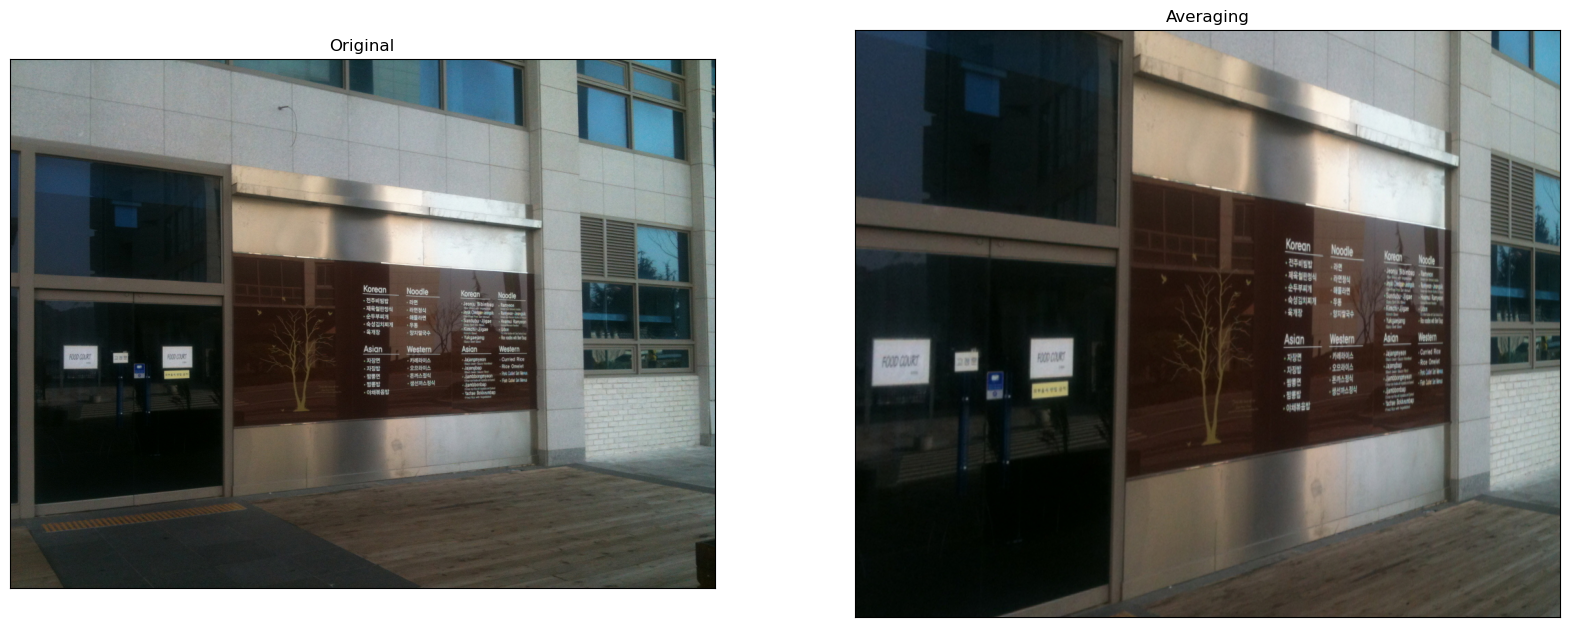

In [10]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('dsu1.jpg',cv2.IMREAD_COLOR)
cv2.cvtColor(img, cv2.COLOR_BGR2RGB, dst=img)
rows,cols,ch = img.shape
pts1 = np.float32([[106,230],[695,171],[115,491],[705,524]])
pts2 = np.float32([[100,100],[950,100],[100,700],[950,700]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(1200,1000))

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
import cv2
import numpy as np

img = cv2.imread('dsu2.jpg')
res = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
rows,cols,ch = img.shape

pts1 = np.float32([[180,240],[820,220],[180,500],[820,512]])
pts2 = np.float32([[100,220],[900,210],[105,500],[900,500]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(1020,770))

cv2.imshow('img',img)
cv2.imshow('resize_img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()